(51, 8)
ciência de dados       21
análise de dados       21
engenharia de dados     9
Name: Área, dtype: int64
['ciência de dados' 'análise de dados' 'engenharia de dados']
['ciência de dados', 'análise de dados', 'engenharia de dados']


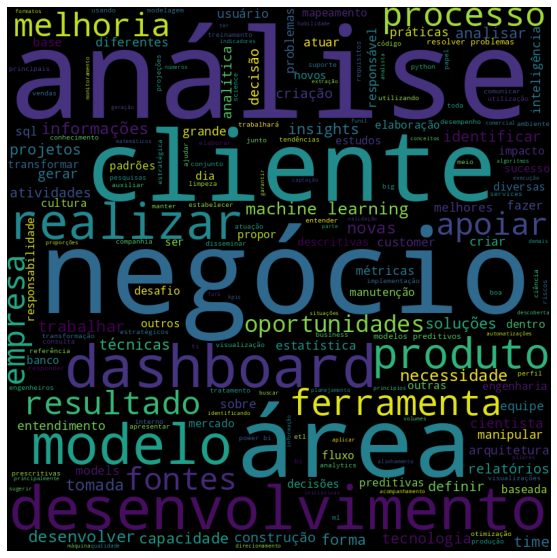

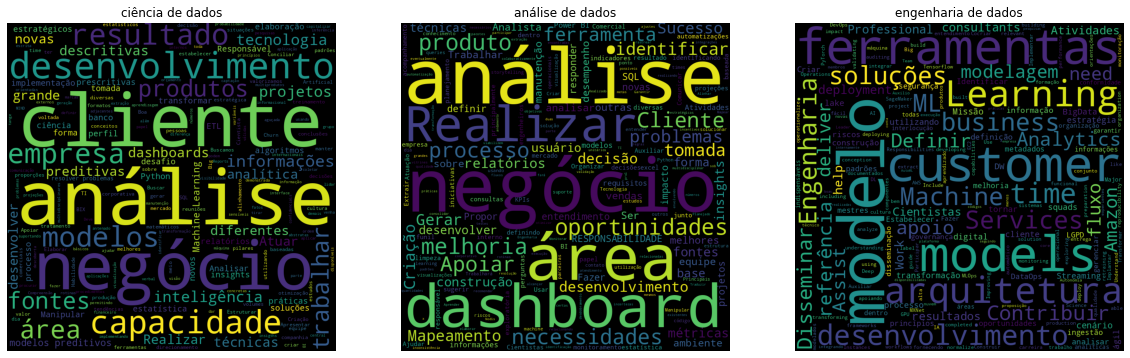

In [19]:
import pandas as pd
import dtale
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = pd.read_excel(
    '20220316 - Vagas para Cientista e Analista de Dados.xlsx')

print(data.shape)

dtale.show(data)

data = data.reset_index().drop('index', axis=1, errors='ignore')
# update columns to strings in case they are numbers
data.columns = [str(c) for c in data.columns]

data = data[[c for c in data.columns if c not in ['n']]]
data.at[40, 'Área'] = 'Cientista de Dados'
data.at[38, 'Área'] = 'Engenharia de dados'
data.at[46, 'Área'] = 'Análise de dados'
data.at[47, 'Área'] = 'Engenharia de Dados'
data.at[48, 'Área'] = 'Engenharia de Dados'
data.at[45, 'Área'] = 'Ciência de dados '
data.at[41, 'Área'] = 'Ciência de dados'
data.at[42, 'Área'] = 'Análise de dados'
data.at[43, 'Área'] = 'Ciência de dados'
data.at[44, 'Área'] = 'Ciência de dados'
data.at[49, 'Área'] = 'Análise de dados'
data.at[50, 'Área'] = 'Análise de dados'
data.at[40, 'Área'] = 'Ciência de dados'
data.at[39, 'Área'] = 'Engenharia de dados'


def clean_text(text):
    return text.lower().strip()


data["Área"] = data["Área"].apply(clean_text)

print(data["Área"].value_counts())

data["Idioma"] = ["pt"] * data.shape[0]

# update columns to strings in case they are numbers
data.columns = [str(c) for c in data.columns]

data.at[10, 'Idioma'] = 'en'
data.at[11, 'Idioma'] = 'en'
data.at[13, 'Idioma'] = 'en'
data.at[15, 'Idioma'] = 'en'
data.at[16, 'Idioma'] = 'en'
data.at[17, 'Idioma'] = 'en'
data.at[20, 'Idioma'] = 'en'
data.at[21, 'Idioma'] = 'en'
data.at[23, 'Idioma'] = 'en'
data.at[24, 'Idioma'] = 'en'
data.at[29, 'Idioma'] = 'en'
data.at[31, 'Idioma'] = 'en'
data.at[32, 'Idioma'] = 'en'
data.at[33, 'Idioma'] = 'en'
data.at[34, 'Idioma'] = 'en'
data.at[50, 'Idioma'] = 'en'
data.at[47, 'Idioma'] = 'en'
data.at[46, 'Idioma'] = 'en'
data.at[45, 'Idioma'] = 'en'

jobs_pt = data[data['Idioma'] == "pt"]
description_pt = jobs_pt["Descrição"]

# nltk.download('punkt')
# nltk.download("stopwords")


def get_words(text):
    text = text.lower().strip()
    tokens = nltk.word_tokenize(text)
    words = [token for token in tokens if token.isalpha()]
    return ' '.join(words)


description_pt = description_pt.apply(get_words)

%matplotlib inline
stopwords_pt = nltk.corpus.stopwords.words("portuguese")
stopwords_en = nltk.corpus.stopwords.words("english")
stopwords_pt.extend(["dados", "dado", "data", "através"])
stopwords_pt.extend(stopwords_en)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
wordcloud = WordCloud(stopwords=stopwords_pt,
                      height=800,
                      width=800).generate(' '.join(description_pt))

# image = wordcloud.to_image()
# image.show()

ax.imshow(wordcloud)
ax.axis("off")

# plt.imshow(im)
# plt.show()

fields = data["Área"].unique()
print(fields)
print(fields.tolist())

fig, axes = plt.subplots(1, 3, figsize=(20, 7))
for idx, field in enumerate(fields):
    selection = jobs_pt[jobs_pt["Área"] == field]
    description_selection_pt = selection["Descrição"]
    description_selection_pt.apply(get_words)
    wordcloud = WordCloud(stopwords=stopwords_pt,
                          height=800,
                          width=800).generate(' '.join(description_selection_pt))
    axes[idx].axis("off")
    axes[idx].set_title(field)
    axes[idx].imshow(wordcloud)


